**1. Import data by pandas**

In [2]:
import pandas as pd
data = pd.read_csv('./train.csv')
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])
data.head()

Number of Rows 614
Number of Columns 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**2. Handling missing values**

*check features missing value*

In [3]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
data.isnull().sum()*100 / len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

*drop missing value if feature < 5%*

In [5]:
dropna_columns = ['Gender', 'Married', 'Dependents', 'LoanAmount', 'Loan_Amount_Term']
data = data.dropna(subset = dropna_columns)
data.isnull().sum()*100 / len(data)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

*add mode value for missing value if feature >= 5%*

In [6]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data.isnull().sum()*100 / len(data)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

**3. Handing Categorical Columns**

In [7]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
data['Gender'] = data.Gender.map({'Male':1, 'Female':0}).astype('int')
data['Gender'].unique()

array([1, 0])

In [9]:
data['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Married'].unique()

array([1, 0])

In [11]:
data['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [12]:
data['Dependents'] = data['Dependents'].replace(to_replace='3+', value = '4')
data['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [13]:
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [14]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


**4. Store Feature Matrix In X And Response (Target) In Vector y**

In [15]:
X = data.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = data['Loan_Status']
(X, y)

(     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
 1         1        1          1          1              0             4583   
 2         1        1          0          1              1             3000   
 3         1        1          0          0              0             2583   
 4         1        0          0          1              0             6000   
 5         1        1          2          1              1             5417   
 ..      ...      ...        ...        ...            ...              ...   
 609       0        0          0          1              0             2900   
 610       1        1          4          1              0             4106   
 611       1        1          1          1              0             8072   
 612       1        1          2          1              0             7583   
 613       0        0          0          1              1             4583   
 
      CoapplicantIncome  LoanAmount  Loan_Amount_T

**5. Feature Scaling**
đưa tất cả các giá trị dữ liệu về cùng 1 phạm vi

In [16]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [17]:
from sklearn.preprocessing import StandardScaler
scale_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
st = StandardScaler()
X[scale_cols] = st.fit_transform(X[scale_cols])
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

**6. Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
(X_train,X_test,y_train,y_test)

(     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
 20        1        1          0          0              0         0.387579   
 365       1        0          0          0              0         0.145298   
 539       1        1          4          1              0         0.179023   
 330       1        0          1          1              0        -0.162083   
 531       1        1          4          1              0        -0.179364   
 ..      ...      ...        ...        ...            ...              ...   
 80        0        0          0          1              0        -0.252351   
 123       1        1          2          1              0        -0.401511   
 300       1        1          0          0              0        -0.595637   
 485       1        1          1          0              0        -0.569127   
 118       1        1          0          1              0         0.036574   
 
      CoapplicantIncome  LoanAmount  Loan_Amount_T

**7. Decision Tree Classifier**

In [20]:
param_grid = {
    'max_depth': range(4,25),
    'min_samples_leaf': range(10,100,10),
    'min_samples_split': range(10,100,10),
    'criterion': ['gini', 'entropy']
}
n_folds = 5
dt = DecisionTreeClassifier(random_state=np.random.randint(0,100))
dt_grid = GridSearchCV(dt, param_grid, cv = n_folds, return_train_score=True, verbose=0)
dt_grid.fit(X_train,y_train)
print(dt_grid.best_params_)

y_pred_best = dt_grid.predict(X_test)
acc = accuracy_score(y_test, y_pred_best)
print(acc)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 10}
0.8018018018018018


**8. Save model**

In [21]:
filename = 'finalized_model.sav'
pickle.dump(dt_grid, open(filename, 'wb'))

**9. Feature Importance**

<AxesSubplot:ylabel='feature'>

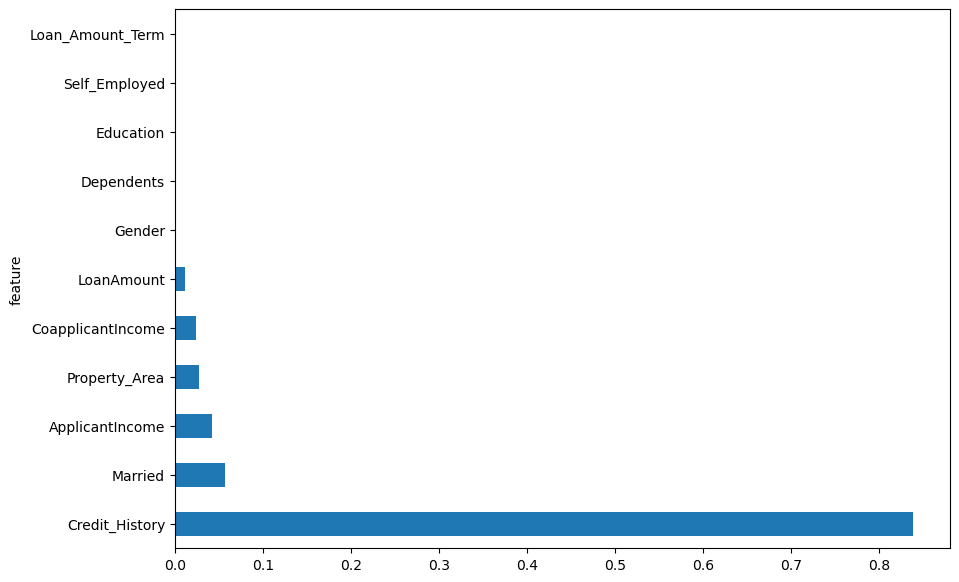

In [22]:
def feature_imp(df, model):
    feat = pd.DataFrame(columns=['feature', 'importance'])
    feat['feature'] = df.columns
    feat['importance'] = model.best_estimator_.feature_importances_
    return feat.sort_values(by='importance', ascending=False)

feature_imp(X_train, dt_grid).plot('feature', 'importance', 'barh', figsize=(10,7), legend=False)